In [62]:
import numpy as np
import matplotlib.pyplot as plt
from init_utils import load_dataset ,plot_decision_boundary
from utils.l_layer_application_utils import forward, compute_cost, L_model_backward, update_params 

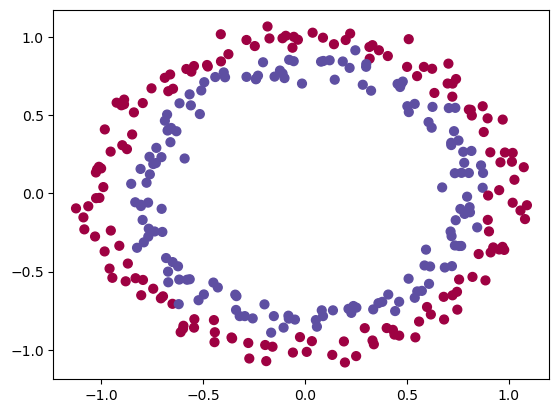

In [63]:
train_x, train_y, test_x, test_y=load_dataset()

In [79]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward(X, parameters)
    predictions = (a3>0.5)
    return predictions

In [64]:
def initialize_parameters_type(layer_dims, init_type="he"):
    parameters = {}
    L = len(layer_dims)
    if init_type == "zeros":
        for l in range(1,L):
            parameters["W" + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
            parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    elif init_type =="random":
        for l in range(1,L):
             parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
             parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
    elif init_type =="he":
        for l in range(1,L):
             parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
             parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
    else:
        raise ValueError("select correct parameters init_type. 'zeros'/'random'/'he'")    
    return parameters    

In [65]:
def model(x,y,learning_rate = 0.075, iterations = 15000, initialization = "random", print_cost = True):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 4,4,4,4,4,1]
    if initialization == "random":
        parameters = initialize_parameters_type(layer_dims , "random")
    elif initialization == "zeros":
        parameters = initialize_parameters_type(layer_dims , "zeros")
    else:
        parameters = initialize_parameters_type(layer_dims ,"he")

    for i in range(iterations):
        AL, cache = forward(x,parameters)
        cost = compute_cost(AL,train_y)
        grads = L_model_backward(AL,train_y, cache)
        parameters = update_params(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            if cost < 0.02:
                learning_rate /= 0.8
        
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6928348412802253
Cost after iteration 1000: 0.6923597354430894
Cost after iteration 2000: 0.6895523289735966
Cost after iteration 3000: 0.584123437025008
Cost after iteration 4000: 0.39861293688282323
Cost after iteration 5000: 0.28684829531372363
Cost after iteration 6000: 0.3772673110416617
Cost after iteration 7000: 0.11717598868522937
Cost after iteration 8000: 0.047501071759267564
Cost after iteration 9000: 0.0466001593698804
Cost after iteration 10000: 0.05753264881545864
Cost after iteration 11000: 0.0963794797422493
Cost after iteration 12000: 0.050401297322298644
Cost after iteration 13000: 0.03359380734354257
Cost after iteration 14000: 0.02740457000264017


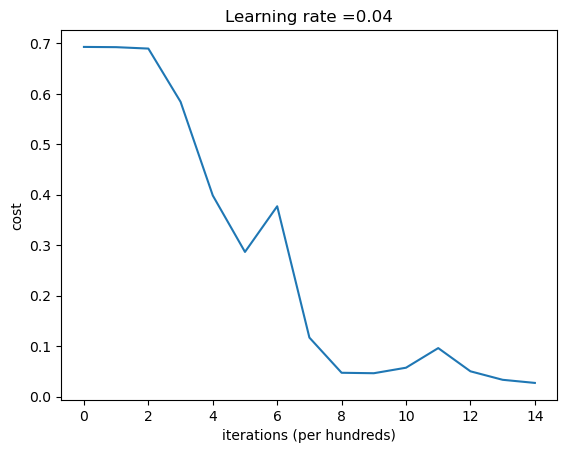

In [68]:
params = model(train_x, train_y,0.04 ,initialization= "he")

acc : 97.00%


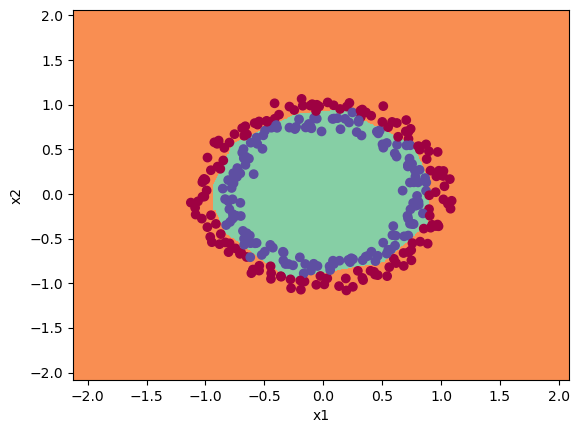

In [80]:
y_hat , _=forward(test_x, params)
y_hat = (y_hat >= 0.5).astype(int)

acc = 1 - np.mean(np.abs(y_hat - test_y))
print(f"acc : {acc * 100 :.2f}%")
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_x, train_y)

array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])